**First Tutorial: [Munging Data](http://wavedatalab.github.io/datawithpython/munge.html#Read-the-csv-file-of-your-choice-using-Pandas)**

*Key Takeaways:*
1. If you change an object by running a cell that has an error, even if you correct that error, you'll still need to go back and reinitialize that object for the problematic cell to run properly.
2. How to import pandas and numpy in Terminal using pip
3. Generally, basic ways of looking at datasets in ways that make it more manageable
4. A couple of the commands were outdated, so I learned more about how to Google what I wanted. For example, `order` is now `sort_values` for Series, and `ix` is now `iloc` or `loc`
    - In doing so, I also learned what "deprecated" means when it comes to programming
    
*Mini Investigation: `ix` vs `iloc` vs `loc`*

In [3]:
print("Hello, World")

Hello, World


In [4]:
import numpy as np
import pandas as pd

In [5]:
cereal = pd.read_csv("cereal.csv")

In [6]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [26]:
cereal.shape # gives #rows, #cols

(77, 16)

In [27]:
len(cereal) # number of rows, basically number of samples

77

In [28]:
cereal.columns # returns column names

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [29]:
cereal['name'][:5] # get first five rows of a column by name

0                    100% Bran
1            100% Natural Bran
2                     All-Bran
3    All-Bran with Extra Fiber
4               Almond Delight
Name: name, dtype: object

In [30]:
cereal[:5] # same as cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [35]:
calorieranges = pd.cut(cereal['rating'],10) # divides rating col into 10 equal ranges
calorieranges.head()

0     (63.44, 71.006]
1    (33.175, 40.741]
2     (55.874, 63.44]
3    (86.139, 93.705]
4    (33.175, 40.741]
Name: rating, dtype: category
Categories (10, interval[float64]): [(17.967, 25.609] < (25.609, 33.175] < (33.175, 40.741] < (40.741, 48.308] ... (63.44, 71.006] < (71.006, 78.572] < (78.572, 86.139] < (86.139, 93.705]]

In [36]:
pd.value_counts(calorieranges)

(33.175, 40.741]    22
(25.609, 33.175]    14
(48.308, 55.874]    12
(40.741, 48.308]    11
(55.874, 63.44]      6
(17.967, 25.609]     6
(63.44, 71.006]      3
(71.006, 78.572]     2
(86.139, 93.705]     1
(78.572, 86.139]     0
Name: rating, dtype: int64

In [40]:
cereal.iloc[0,0:6] # gives first six columns of first (zero-th) row

name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
Name: 0, dtype: object

In [52]:
cereal['calories'].sort_values()[:5] # sorts entries by value in calories column

3     50
54    50
55    50
0     70
2     70
Name: calories, dtype: int64

In [56]:
cereal.dtypes # gives datatypes of each column

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [60]:
cereal['mfr'].unique() # returns unique values for column by name

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [62]:
len(cereal['mfr'].unique()) # returns number of unique values for a column

7

In [66]:
cereal.loc[0:3,'calories'] # index into certain column by name and get first four rows

0     70
1    120
2     70
3     50
Name: calories, dtype: int64

In [68]:
cereal.loc[0:3,'type'] == "C" # obtain binary values: true if type is C (cold)

0    True
1    True
2    True
3    True
Name: type, dtype: bool

**Second Tutorial: [Aggregating Data](http://wavedatalab.github.io/datawithpython/aggregate.html)**

*Key Takeaways:*
1. `melt` transforms a dataframe from wide to long format. Params are dataframe and id_vars, which is basically the thing you want on the x-axis. This is the column that stays intact.
2. It was interesting that the line 
```
subset = cereal[(cereal['protein'] > 4 ) & (cereal['rating'] > 50)]
``` 
used `&` rather than `and`. I looked it up and found out that `&` and `|` are used for complex query strings on data frames in pandas. They're bitwise operators, whereas `and` is a boolean. One answer from [stackoverflow](https://stackoverflow.com/questions/22646463/and-boolean-vs-bitwise-why-difference-in-behavior-with-lists-vs-nump) was really helpful, quoted below.

<blockquote> and tests whether both expressions are logically True while & (when used with True/False values) tests if both are True.
    
In Python, empty built-in objects are typically treated as logically False while non-empty built-ins are logically True. This facilitates the common use case where you want to do something if a list is empty and something else if the list is not.
    
If you are not dealing with arrays and are not performing math manipulations of integers, you probably want and.
    
If you have vectors of truth values that you wish to combine, use numpy with &.</blockquote>

*Mini investigation: the `lambda` function*

In [9]:
melt = pd.melt(cereal, id_vars = 'vitamins')

In [12]:
melt.iloc[0:5,:]

,vitamins,variable,value
0,25,name,100% Bran
1,0,name,100% Natural Bran
2,25,name,All-Bran
3,25,name,All-Bran with Extra Fiber
4,25,name,Almond Delight


In [15]:
melt[melt["variable"] == "calories"] # can filter the variable column

,vitamins,variable,value
231,25,calories,70
232,0,calories,120
233,25,calories,70
234,25,calories,50
235,25,calories,110
...,...,...,...
303,25,calories,110
304,25,calories,110
305,25,calories,100
306,25,calories,100


In [18]:
cereal.describe() # returns descriptive statistics of the dataset. like anova in R

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [20]:
pd.crosstab(cereal['cups'],cereal['calories']) # Crosstab of the data by specified columns

calories,50,70,80,90,100,110,120,130,140,150,160
cups,,,,,,,,,,,
0.25,0,0,0,0,0,1,0,0,0,0,0
0.33,0,2,0,0,0,0,1,0,0,0,0
0.50,1,0,0,1,2,2,0,1,0,0,0
0.67,0,0,0,4,3,0,4,0,1,0,1
0.75,0,0,0,0,2,9,3,1,1,0,0
0.80,0,0,0,0,1,0,0,0,0,0,0
0.88,0,0,0,0,2,0,0,0,0,0,0
1.00,2,0,1,2,7,13,2,0,1,2,0
1.13,0,0,0,0,0,1,0,0,0,0,0


In [26]:
# return a subset of data
subset = cereal[(cereal['protein'] > 4 ) & (cereal['rating'] > 50)]
subset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324


In [28]:
subset.shape

(3, 16)

In [35]:
qry1 = cereal.query('(protein > 3) & (protein < 10)')
qry1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [36]:
qry1.shape

(11, 16)

In [38]:
grouped1 = cereal.groupby(['mfr','type']).mean() # group data and get mean
grouped1

calories   protein       fat      sodium     fiber      carbo  \
mfr type                                                                    
A   H     100.000000  4.000000  1.000000    0.000000  0.000000  16.000000   
G   C     111.363636  2.318182  1.363636  200.454545  1.272727  14.727273   
K   C     108.695652  2.652174  0.608696  174.782609  2.739130  15.130435   
N   C      84.000000  2.800000  0.200000   29.000000  4.600000  15.000000   
    H     100.000000  3.000000  0.000000   80.000000  1.000000  21.000000   
P   C     108.888889  2.444444  0.888889  146.111111  2.777778  13.222222   
Q   C      94.285714  2.285714  1.714286  105.714286  1.142857  11.571429   
    H     100.000000  5.000000  2.000000    0.000000  2.700000  -1.000000   
R   C     115.000000  2.500000  1.250000  198.125000  1.875000  17.625000   

            sugars      potass   vitamins     shelf    weight      cups  \
mfr type                                                                  
A   H     3.000000   95.000000  25.000000  2.000000  1.000000  1.000000   
G   C     7.954545   85.227273  35.227273  2.136364  1.049091  0.875000   
K   C     7.565217  103.043478  34.782609  2.347826  1.077826  0.796087   
N   C     2.200000  145.000000  10.000000  1.600000  0.966000  0.734000   
    H     0.000000   -1.000000   0.000000  2.000000  1.000000  1.000000   
P   C     8.777778  113.888889  25.000000  2.444444  1.064444  0.714444   
Q   C     6.142857   69.285714  14.285714  2.571429  0.857143  0.845714   
    H    -1.000000  110.000000   0.000000  1.000000  1.000000  0.670000   
R   C     6.125000   89.250000  25.000000  2.000000  1.000000  0.871250   

             rating  
mfr type             
A   H     54.850917  
G   C     34.485852  
K   C     44.038462  
N   C     68.655517  
    H     64.533816  
P   C     41.705744  
Q   C     41.785647  
    H     50.828392  
R   C     41.542997

In [46]:
# check boolean condition, if there are any cereals with over 120 cals/serving
(cereal.loc[:,'calories'] > 120).any()

True

In [47]:
# might as well go and find which ones apply to the previous cell
cereal[(cereal['calories']>120)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
39,Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,36.471512
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.00,1.00,34.139765
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
49,Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320
51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785


In [49]:
cereal.vitamins.describe() # descriptive stats of single column

count     77.000000
mean      28.246753
std       22.342523
min        0.000000
25%       25.000000
50%       25.000000
75%       25.000000
max      100.000000
Name: vitamins, dtype: float64

In [51]:
# group data and obtain the mean values. in this case, group by hot vs. cold
hotcold = cereal.groupby('type').aggregate(np.mean)
hotcold

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
type,,,,,,,,,,,,,
C,107.162162,2.486486,1.013514,165.067568,2.189189,14.702703,7.175676,97.216216,29.054054,2.229730,1.030811,0.818243,42.095218
H,100.000000,4.000000,1.000000,26.666667,1.233333,12.000000,0.666667,68.000000,8.333333,1.666667,1.000000,0.890000,56.737708


In [55]:
# gives sum of grouping. not super relevant in the case of cereal, as cold outnumbers hot
tempsum = cereal.groupby('type').aggregate(np.sum)
tempsum

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
type,,,,,,,,,,,,,
C,7930,184,75,12215,162.0,1088.0,531,7194,2150,165,76.28,60.55,3115.046159
H,300,12,3,80,3.7,36.0,2,204,25,5,3.00,2.67,170.213125


In [60]:
criterion = cereal['name'].map(lambda x: x.startswith('A'))
criterion.head()

0    False
1    False
2     True
3     True
4     True
Name: name, dtype: bool

**Third Tutorial: [Visualizing Data](http://wavedatalab.github.io/datawithpython/visualize.html)**

*Key Takeaways:*
1. I learned that `%matplotlib inline` is a "magic function" in IPython. It's a line oriented magic (indicated by the % character prefix), with parameters following the %. This specific line sets the backend of matplotlib to the "inline" backend, meaning that the graphs created will be included in the notebook and stored in the document. I read up on the documentation [here](https://ipython.readthedocs.io/en/stable/interactive/plotting.html).
2. I learned a lot about filling in the missing parts of the tutorial itself. There were lots of assumptions of prior knowledge that I didn't really have, but it was fun looking up the errors in my code and filling those gaps in my knowledge. For example, the tutorial started using commands with `sns` and mine wouldn't compile; I found out I needed to import `seaborn` for certain visualizations, which the tutorial skipped over. I read up on the documentation and how to do that [here](http://seaborn.pydata.org/generated/seaborn.catplot.html).
    The tutorial was also a little bit outdated. I learned that the `factorplot` function had been replaced with the `catplot`
    
*Mini investigation: documentation for `seaborn`*

In [1]:
%matplotlib inline
import seaborn as sns

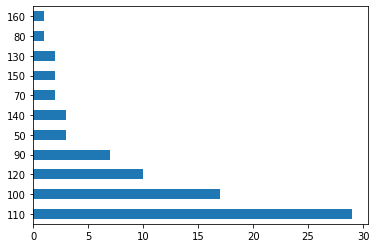

In [9]:
# plot certain column
cereal.calories.value_counts().plot(kind='barh')

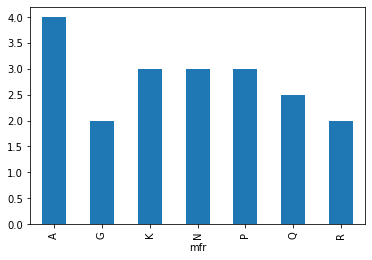

In [10]:
# plot median values
cereal.groupby('mfr')['protein'].agg(np.median).plot(kind = 'bar')

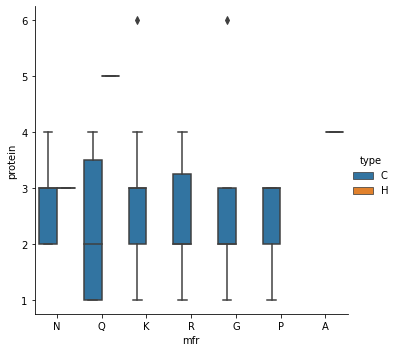

In [13]:
# box plot
# outdated: g = sns.factorplot('protein', 'fat', 'carbo', cereal, kind = "box")
g = sns.catplot('mfr', 'protein', 'type', cereal, kind = "box")

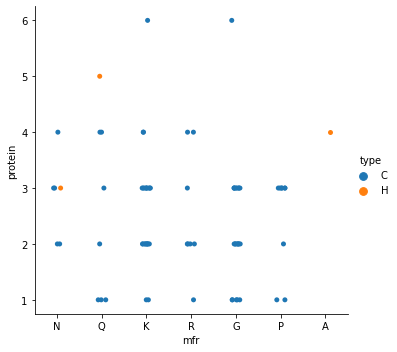

In [23]:
g1 = sns.catplot(x="mfr", y="protein", hue="type", data=cereal)

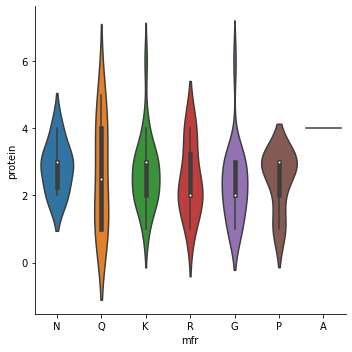

In [26]:
# violin plot
g = sns.catplot(x="mfr", y="protein", data=cereal, kind = "violin")

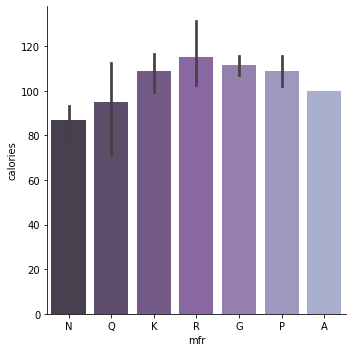

In [30]:
sns.catplot("mfr", "calories", data=cereal, kind = "bar", palette="BuPu_d")

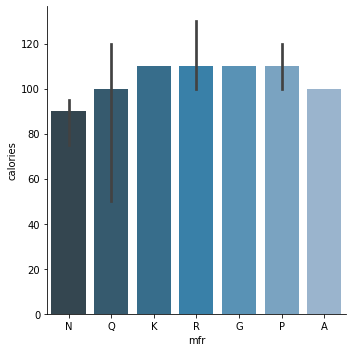

In [39]:
# box plot with median values
sns.catplot("mfr", "calories", data=cereal, palette="PuBu_d", estimator=np.median, kind="bar");

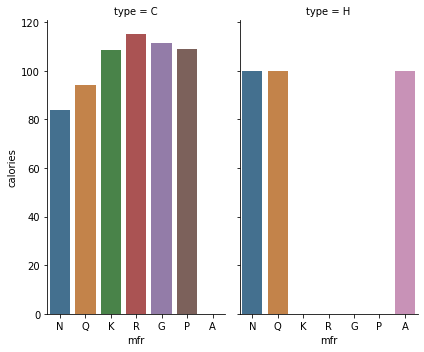

In [47]:
# box plot with adjusted presentation
g2 = sns.catplot(x="mfr", y="calories", col="type",
                data=cereal, saturation=.5,
                kind="bar", ci=None, aspect=.6)